In [2]:
from keras.utils import plot_model
import pydot
from keras.models import Model
from keras.layers import Input, Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import  confusion_matrix, accuracy_score

import pandas as pd
import numpy as np
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [5]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Applying Standard Scaler

In [7]:
sc = StandardScaler()
data.iloc[:, [0,3,5,9]] = sc.fit_transform(data.iloc[:, [0,3,5,9]])

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


#  Splitting Input and Output

In [9]:
X = data.iloc[:, 0:-1].values
Y = data.iloc[:, -1:].values

In [10]:
X

array([[-0.3262214220367463, 'France', 'Female', ..., 1, 1,
        0.021886493995386117],
       [-0.4400359548576657, 'Spain', 'Female', ..., 0, 1,
        0.21653375188734025],
       [-1.536794180222889, 'France', 'Female', ..., 1, 0,
        0.24068690006348814],
       ...,
       [0.6049883919525944, 'France', 'Female', ..., 0, 1,
        -1.0086430751933764],
       [1.2568352617451328, 'Germany', 'Male', ..., 1, 0,
        -0.12523071253853688],
       [1.4637707759649863, 'France', 'Female', ..., 1, 0,
        -1.07636975538291]], dtype=object)

In [11]:
Y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

# Applying One hot encoding

In [12]:
lb = LabelEncoder()
X[:, 1] = lb.fit_transform(X[:, 1])
X[:, 2] = lb.fit_transform(X[:, 2])

In [13]:
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

In [14]:
X[0:3]

array([[ 1.        ,  0.        ,  0.        , -0.32622142,  0.        ,
         0.29351742,  2.        , -1.22584767,  1.        ,  1.        ,
         1.        ,  0.02188649],
       [ 0.        ,  0.        ,  1.        , -0.44003595,  0.        ,
         0.19816383,  1.        ,  0.11735002,  1.        ,  0.        ,
         1.        ,  0.21653375],
       [ 1.        ,  0.        ,  0.        , -1.53679418,  0.        ,
         0.29351742,  8.        ,  1.33305335,  3.        ,  1.        ,
         0.        ,  0.2406869 ]])

In [15]:
X.shape

(10000, 12)

In [16]:
X = X[:,1:]

In [17]:
X.shape

(10000, 11)

In [18]:
X[0]

array([ 0.        ,  0.        , -0.32622142,  0.        ,  0.29351742,
        2.        , -1.22584767,  1.        ,  1.        ,  1.        ,
        0.02188649])

# Splitting data in to training and testing

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000, 1), (2000, 1))

# Using Keras Functional API

The Keras Python library makes creating deep learning models fast and easy. Moreover we can create more complicated models using functional API

The functional API uses the same layers as the Sequential model but provides more flexibility in putting them together. In the functional API you define the layers first, and then create the Model, compile it, and fit (train) it.

# Connecting Layers

The layers in the model are connected pairwise.

This is done by specifying where the input comes from when defining each new layer. A bracket notation is used, such that after the layer is created, the layer from which the input to the current layer comes from is specified.

for example. We can create the input layer as below, then create a hidden layer as a Dense that receives input only from the input layer.

# Instantiate a Keras tensor

In [21]:
visible = Input(shape = (11,))

In [22]:
visible

<tf.Tensor 'input_1:0' shape=(?, 11) dtype=float32>

# Creating 1st hidden layer

Attributes:-

output_dim = number of nodes 

activation = activation function

use_bias = whether the layer uses a bias vector

In [39]:
hidden1 = Dense(output_dim = 6, activation = 'relu', use_bias = True, name = 'hidden_layer_1')(visible)

# Creating the 2nd Hidden Layer

In [40]:
hidden2 = Dense(output_dim = 6, activation = 'relu', use_bias = True, name = 'hidden_layer_2')(hidden1)

# Creating the Output Layer

In [41]:
output = Dense(output_dim = 1, activation = 'sigmoid', name = 'output_layer')(hidden2)

# Creating the model

This will create a model that include the Input Layer and 3 Dense Layers

In [43]:
model = Model(inputs = visible, outputs = output)

In [44]:
model

# Summarize the Layers

In [45]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11)                0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 6)                 72        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 6)                 42        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# Compile the Artificial Neural network

In [46]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the training set

In [47]:
model.fit(x = x_train, y = y_train, batch_size = 10, epochs = 100) 

Epoch 1/100
8000/8000 [==============================] - 2s 303us/step - loss: 0.5020 - accuracy: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.4553 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4379 - accuracy: 0.7968
Epoch 4/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.4317 - accuracy: 0.8051
Epoch 5/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.4279 - accuracy: 0.8099
Epoch 6/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4237 - accuracy: 0.8120
Epoch 7/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.4204 - accuracy: 0.8164
Epoch 8/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.4171 - accuracy: 0.8189
Epoch 9/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4149 - accuracy: 0.8223
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 1s 139us/step - loss: 0.3689 - accuracy: 0.8428
Epoch 79/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.3687 - accuracy: 0.8415
Epoch 80/100
8000/8000 [==============================] - 1s 146us/step - loss: 0.3674 - accuracy: 0.8421
Epoch 81/100
8000/8000 [==============================] - 1s 172us/step - loss: 0.3686 - accuracy: 0.8418
Epoch 82/100
8000/8000 [==============================] - 1s 182us/step - loss: 0.3677 - accuracy: 0.8405
Epoch 83/100
8000/8000 [==============================] - 2s 191us/step - loss: 0.3678 - accuracy: 0.8432
Epoch 84/100
8000/8000 [==============================] - 1s 179us/step - loss: 0.3680 - accuracy: 0.8411
Epoch 85/100
8000/8000 [==============================] - 1s 167us/step - loss: 0.3677 - accuracy: 0.8419
Epoch 86/100
8000/8000 [==============================] - 1s 140us/step - loss: 0.3671 - accuracy: 0.8431
Epoch 87/100
8000/8000 [==============================] - 1

# Predicting the Test set Result

In [48]:
y_pred = model.predict(x_test)

In [49]:
y_pred

array([[0.16671869],
       [0.27475262],
       [0.20642674],
       ...,
       [0.34064713],
       [0.12664905],
       [0.13129064]], dtype=float32)

In [50]:
y_pred = (y_pred > 0.5)

In [51]:
y_pred[0:6]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True]])

In [52]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1528,   67],
       [ 238,  167]])

In [53]:
score = accuracy_score(y_test, y_pred)
score

0.8475

# Keras Graphs

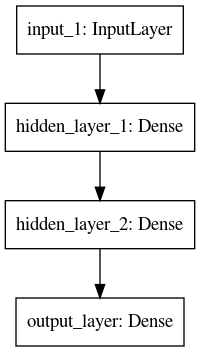

In [54]:
plot_model(model)